In [ ]:
#MUST see last screenshot of folder
#OPTION1== all dataset is used for training then same all dataset is used for testing later means we teach 100 math question same 100 question is for testing is very bad idea then student already now all answer
#OPTION2==split dataset for training and testing 70 question we teach and 3o question for testing is also bad idea if we teach geometry and asked question algebra  is very difficult to answer
#OPTION3== K FOLD cross validation 100 question divide  5 parts each contain 20 question, first iteration first 20 for test remaining 80 used for training,
 #second iteration first 20 is for training then next 20 for testing and remaining60  also for training likewise we follow approach
 #lastly we find avg of all iteration and that is called cross_val_score
#process begins with a dataset of 100 samples, which is split into 'k' number of groups. In the diagram, it appears to be split into 5 groups (folds)
# Once all folds have been used as the test set, the scores from each fold are averaged to obtain a single performance metric

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
![image-4.png](attachment:image-4.png)
![image-5.png](attachment:image-5.png)

In [1]:
#load digits
#trained the varible and generate model
# use different model(logistic,svm,RF) with different parameter to check accuracy using score 
#apply k fold cross validation
#use different splits like n_splits=3 means  if we have 100 dataset mens 3 splits means 33% 3 fold and each fold divide 3 times
#find train indices and test indices in each fold
#create score function to check accuracy of different model
#create a list that contains score of different model in each fold
#create a list that contains score of different model in each fold using cross_val_score
#Parameter tunning  by taking avg of score each fold  in different model
#Parameter tunning in RF by taking differnt n_estimator


# Theory Question

When to Use K-Fold Cross-Validation

How K-Fold Works:

Parameters of K-Fold and When to Use Them:

Best Practices for K-Fold Cross-Validation:

How K-Fold Cross-Validation Improves Model Accuracy and Helps Choose the Best Model

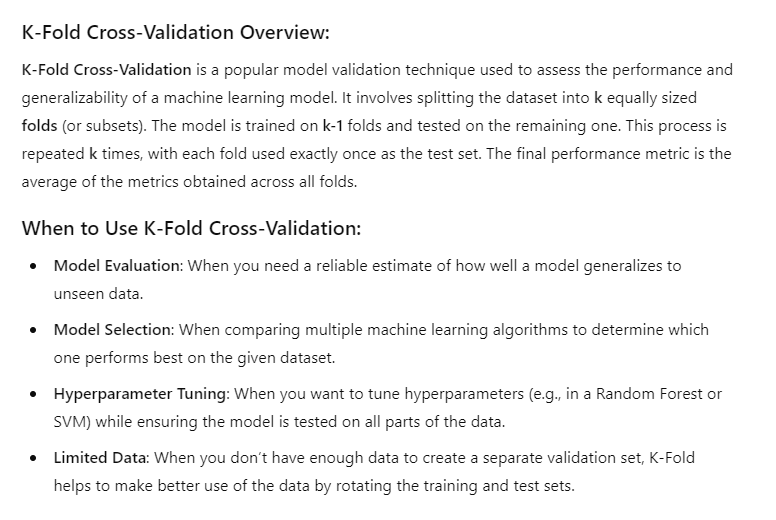

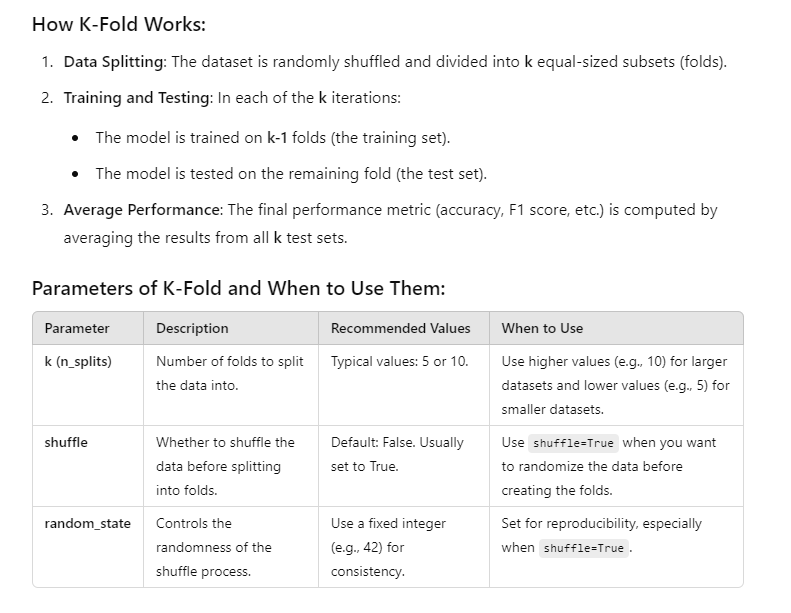

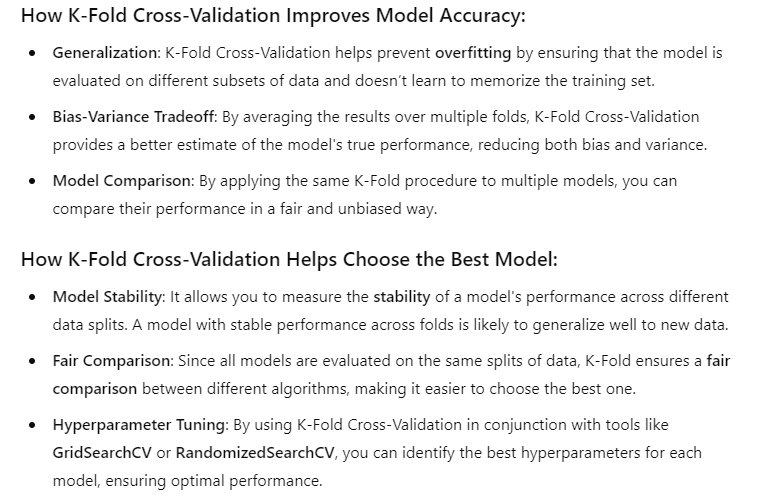

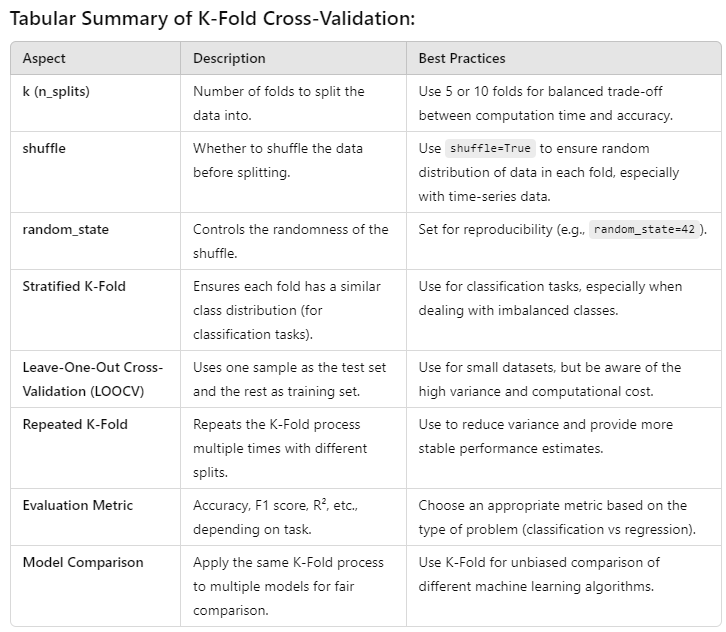

# Question

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):

def get_score(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)
    
scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))

scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))

scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

np.average(scores1)
    

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [ ]:
#Logistic Regression

In [4]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9481481481481482

In [5]:
#SVM

In [6]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.3648148148148148

In [7]:
#Random Forest

In [8]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9611111111111111

In [9]:
#KFold cross validation

In [10]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [11]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [12]:
#Use KFold for our digits example

In [13]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [14]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9537037037037037

In [15]:
get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test)

0.3648148148148148

In [16]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [17]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [18]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [19]:
scores_rf

[0.9232053422370617, 0.9415692821368948, 0.9181969949916527]

In [20]:
#cross_val_score function

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
#Logistic regression model performance using cross_val_score

In [23]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [24]:
#svm model performance using cross_val_score

In [25]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [26]:
#random forest performance using cross_val_score

In [27]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.94156928, 0.93989983, 0.92320534])

In [28]:
#Parameter tunning using k fold cross validation

In [29]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8798230912476722

In [30]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9387740533829918

In [31]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9443265052762259

In [32]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9493606455617629

In [ ]:
#trained the varible and generate model
# use different model(logistic,svm,RF) with different parameter to check accuracy using score 
#apply k fold cross validation
#use different splits like n_splits=3 means  if we have 100 dataset mens 3 splits means 33% 3 fold and each fold divide 3 times
#find train indices and test indices in each fold
#create score function to check accuracy of different model
#create a list that contains score of different model in each fold
#create a list that contains score of different model in each fold using cross_val_score
#Parameter tunning  by taking avg of score each fold  in different model
#Parameter tunning in RF by taking differnt n_estimator